In [1]:
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
gen_sub = pd.read_csv('gender_submission.csv')

# Columns description
### - Survived: Yes = 1, No = 0
### - Pclass: 1st class = 1, 2nd class = 2, 3rd class = 3
### - SibSp = Amount of siblings/spouse on the boat
### - Parch = Amount of parents/children
### - Ticket = Ticket Number
### - Fare = Passenger fare
### - Cabin = Cabin number
### - Embarked = Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


['Survived']


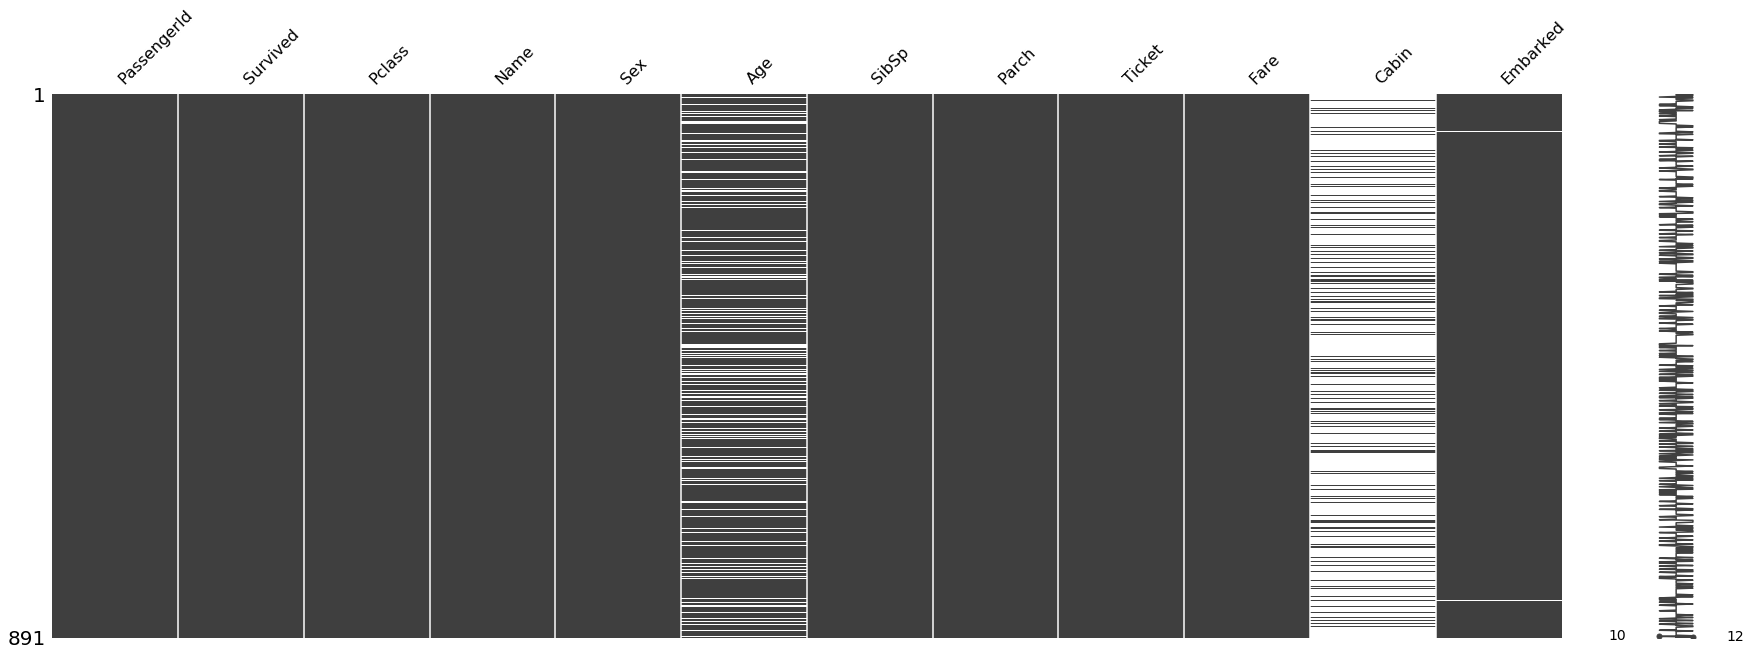

In [4]:
print(np.setdiff1d(train_set.columns,test_set.columns))
missingno.matrix(train_set, figsize = (30,10))

In [5]:
print('Missing data set in column cabin:', + train_set['Cabin'].isna().sum())
print('Missing data set in column age:', + train_set['Age'].isna().sum())

Missing data set in column cabin: 687
Missing data set in column age: 177


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


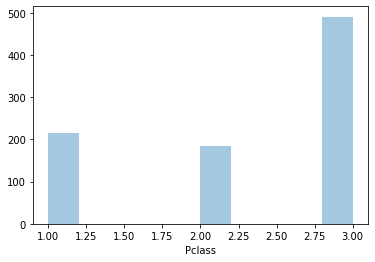

In [8]:
sns.distplot(train_set.Pclass, kde = False)
plt.show()

## Encodes the Sex column into the 'male' column.
### Male = 1, Female = 0

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_set['Sex'] = encoder.fit_transform(train_set['Sex'])
# Changing the column 'Sex' to "Male" as it is either to interpret
# when it is encoded
train_set = train_set.rename(columns = {'Sex':'Male'})
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[2])], remainder='passthrough')
train_set_1Hot = pd.DataFrame(ct.fit_transform(train_set))
train_set_1Hot.columns = ['1st_class', '2nd_class','3rd_class','PassID','Survived','Name','Male','Age'
                         ,'SibSp','Parch','Ticket','Fare','Cabin','Embarked']
train_set_1Hot

,1st_class,2nd_class,3rd_class,PassID,Survived,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,1,1,0,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,NaN,S
1,1,0,0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,0,0,1,3,1,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,0,0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,C123,S
4,0,0,1,5,0,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,887,0,"Montvila, Rev. Juozas",1,27,0,0,211536,13,NaN,S
887,1,0,0,888,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30,B42,S
888,0,0,1,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,0,0,890,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30,C148,C


In [11]:
train_set_1Hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1st_class  891 non-null    object
 1   2nd_class  891 non-null    object
 2   3rd_class  891 non-null    object
 3   PassID     891 non-null    object
 4   Survived   891 non-null    object
 5   Name       891 non-null    object
 6   Male       891 non-null    object
 7   Age        714 non-null    object
 8   SibSp      891 non-null    object
 9   Parch      891 non-null    object
 10  Ticket     891 non-null    object
 11  Fare       891 non-null    object
 12  Cabin      204 non-null    object
 13  Embarked   889 non-null    object
dtypes: object(14)
memory usage: 97.6+ KB


In [12]:
train_set_1Hot = train_set_1Hot.drop(columns = 'Cabin')

In [13]:
train_set_1Hot

,1st_class,2nd_class,3rd_class,PassID,Survived,Name,Male,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,1,1,0,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,S
1,1,0,0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C
2,0,0,1,3,1,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,S
3,1,0,0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,S
4,0,0,1,5,0,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,887,0,"Montvila, Rev. Juozas",1,27,0,0,211536,13,S
887,1,0,0,888,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30,S
888,0,0,1,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,S
889,1,0,0,890,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30,C


In [14]:
train_set_1Hot.to_csv('/Users/sethfriesz/Titanic_workshop/titanic/train_set_1Hot.csv')

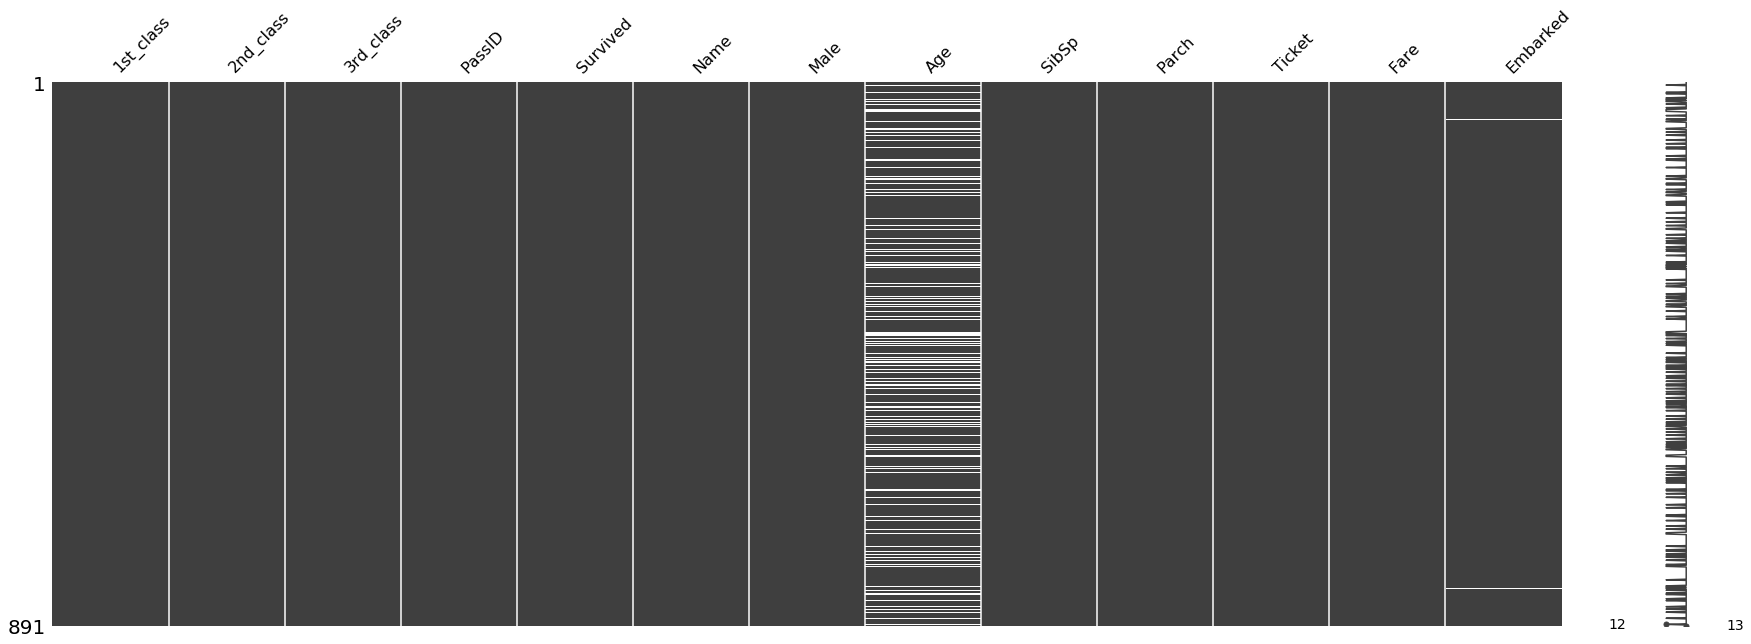

In [15]:
missingno.matrix(train_set_1Hot, figsize = (30,10))

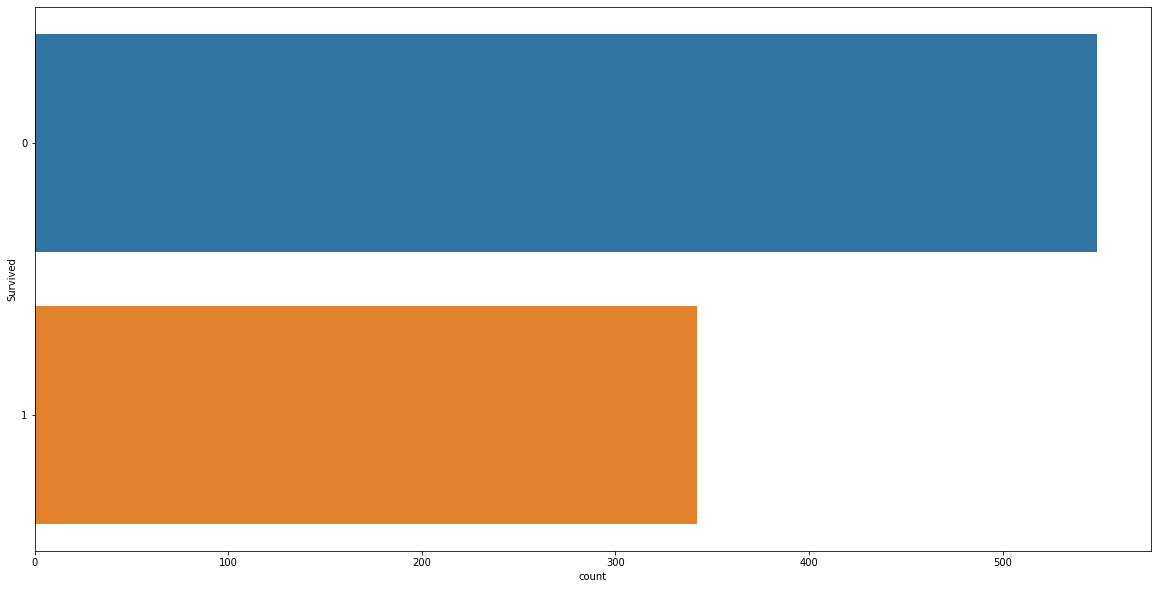

In [16]:
fig = plt.figure(figsize = (20,10))
sns.countplot(data=train_set_1Hot, y = 'Survived')

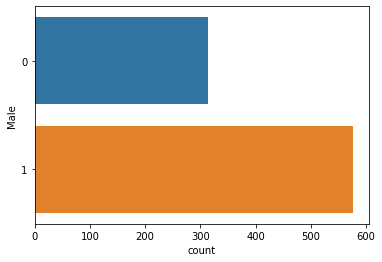

In [17]:
sns.countplot(data = train_set_1Hot, y = 'Male')

In [18]:
_1class = train_set_1Hot.loc[train_set_1Hot['1st_class'] == 1, 'Age']
_2class = train_set_1Hot.loc[train_set_1Hot['2nd_class'] == 1, 'Age']
_3class = train_set_1Hot.loc[train_set_1Hot['3rd_class'] == 1, 'Age']



In [19]:
print('Null in first class:', + _1class.isnull().sum())
print('Null in second class:', + _2class.isnull().sum())
print('Null in third class:', + _3class.isnull().sum())

Null in first class: 30
Null in second class: 11
Null in third class: 136


In [20]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values= np.nan, strategy='mean')

_1class = pd.DataFrame(_1class)
_2class = pd.DataFrame(_2class)
_3class = pd.DataFrame(_3class)

_1class = pd.DataFrame(mean_imputer.fit_transform(_1class))
_2class = pd.DataFrame(mean_imputer.fit_transform(_2class))
_3class = pd.DataFrame(mean_imputer.fit_transform(_3class))

print('Null in first class:', + _1class.isnull().sum())
print('Null in second class:', + _2class.isnull().sum())
print('Null in third class:', + _3class.isnull().sum())


Null in first class: 0    0
dtype: int64
Null in second class: 0    0
dtype: int64
Null in third class: 0    0
dtype: int64


In [21]:
type(_1class)

pandas.core.frame.DataFrame

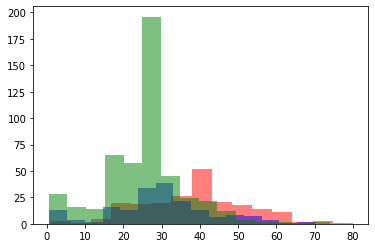

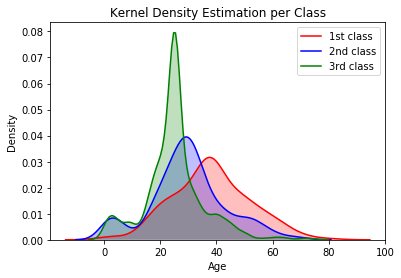

In [22]:
sns.set_palette('pastel')
def matplot_histogram(_1class, _2class, _3class):
    kwargs = dict(alpha = 0.5, bins =15)
    plt.hist(_1class[0], **kwargs, label = '1st class', color = 'r')
    plt.hist(_2class[0], **kwargs, label = '2nd class', color = 'b')
    plt.hist(_3class[0], **kwargs, label = '3rd class', color = 'g')
    plt.show()
    
def seaborn_plot(_1class, _2class, _3class):
    sns.kdeplot(_1class[0], shade = True, color= 'r', label = '1st class')
    sns.kdeplot(_2class[0], shade = True, color ='b', label = '2nd class')
    sns.kdeplot(_3class[0], shade = True, color = 'g', label='3rd class')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.title('Kernel Density Estimation per Class')
    
matplot_histogram(_1class, _2class, _3class)

seaborn_plot(_1class, _2class, _3class)


0    29.87763
dtype: float64